# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Final term project</b></u>

### Roster Name: Rohan Athalye
### Student ID: 014099982
### Email address: rohan.athalye@sjsu.edu

##  <u> Project description/introduction text (the background information) </u>

According to UNICEF and the World Health Organization (WHO), approximately 1 in 3 individuals lack access to safe drinking water. Having access to safe drinking water is a fundamental human right and essential to human health. Thus, the problem I want to solve is predicting whether water is safe to drink based on various water quality metrics. To me, this is a particularly interesting problem as I am not too familiar with the factors that go into assessing water quality, so it would be helpful to know the appropriate amounts for each factor in order to have safe drinking water. According to the Centers for Disease Control and Prevention (CDC), drinking contaminated water can cause adverse health effects such as diarrhea, cholera, and typhoid fever, all of which may even lead to death. Thus, this is an extremely important problem that needs to be solved as soon as possible.

##  <u> Machine learning algorithm selected for this project </u>

For this project, I used a Support Vector Machine (SVM). An SVM works by finding a hyperplane in an N-dimensional space that distinctly classifies some data points. The goal is to find that hyperplane with the maximum margin, meaning the maximum distance between the data points of 2 classes. Doing so would make it easier to classify future data points.

##  <u> Dataset source </u>

https://www.kaggle.com/datasets/adityakadiwal/water-potability

##  <u> References and sources </u>

* SVM.Iris.ipynb from Canvas under Files/Example Jupyter Notebooks
* SVM.Breast.ipynb from Canvas under Files/Example Jupyter Notebooks





##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
np.random.seed(42)

#### Code the solution

#### Load the dataset

In [ ]:
# Mounts Google Drive in Google Colab.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Loads the data from the csv file into a pandas dataframe.
csv_file = "/content/drive/MyDrive/Fall 2022/CS 156/Project/water_potability.csv"
water_df = pd.read_csv(csv_file)
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Handle missing data

In [ ]:
# Gets information about the dataframe.
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Drops rows with missing data.
water_df = water_df.dropna()
water_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


#### Data Exploration

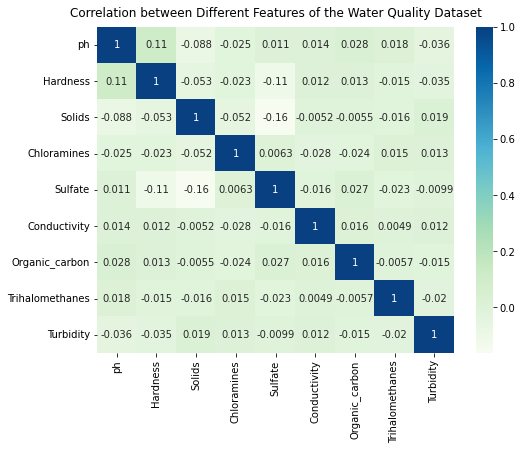

In [ ]:
# Plots a correlation matrix.
plt.figure(figsize=(8,6))
water_corr = water_df.drop('Potability', axis=1).corr()
sns.heatmap(data=water_corr, annot=True, cmap="GnBu")
plt.title("Correlation between Different Features of the Water Quality Dataset", pad=10);

#### Get the independent variables and dependent variable

In [ ]:
X = water_df.iloc[:, 0:9]
Y = water_df['Potability']

#### Rescale the data using StandardScaler

In [ ]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

#### Split the data into training and test sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=42, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1608, 9), (1608,), (403, 9), (403,))

#### Train the SVM model

In [ ]:
model = SVC().fit(X_train,Y_train)

#### Report results from 5-fold cross-validation

In [ ]:
cross_val_scores = cross_val_score(model, X_train, Y_train)
print("Individual cross-validation accuracies:", cross_val_scores) # Gets individual cross-validation accuracies.
print("Mean cross-validation accuracy:", cross_val_scores.mean()) # Gets average accuracy across all folds.

Individual cross-validation accuracies: [0.71428571 0.66149068 0.66459627 0.65732087 0.67601246]
Mean cross-validation accuracy: 0.6747412008281574


#### Assess model performance on the training and test sets

In [ ]:
print('Accuracy of SVM on training set: {:.2f}'.format(model.score(X_train, Y_train) * 100))
print('Accuracy of SVM on test set: {:.2f}'.format(model.score(X_test, Y_test) * 100))

Accuracy of SVM on training set: 75.50
Accuracy of SVM on test set: 69.48


#### Plot a confusion matrix to show training set results

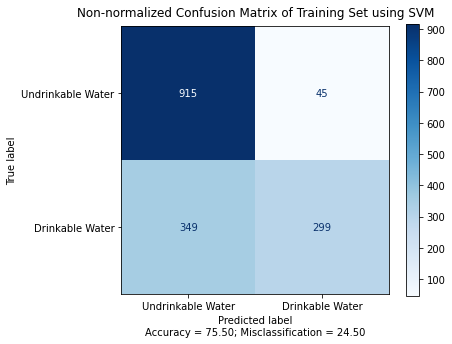

In [ ]:
class_names = ['Undrinkable Water', 'Drinkable Water']
train_accuracy = model.score(X_train, Y_train) * 100

fig, ax = plt.subplots(figsize=(6,5))
disp = plot_confusion_matrix(model, X_train, Y_train, xticks_rotation='horizontal', display_labels=class_names, cmap=plt.cm.Blues, normalize=None, ax=ax)
disp.ax_.set_title('Non-normalized Confusion Matrix of Training Set using SVM', pad=10)
plt.xlabel('Predicted label\nAccuracy = {:0.2f}; Misclassification = {:0.2f}'.format(train_accuracy, 100 - train_accuracy))
plt.show()

#### Plot a confusion matrix to show test set results

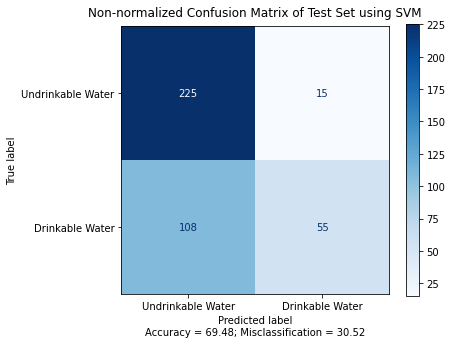

In [ ]:
test_accuracy = model.score(X_test, Y_test) * 100

fig, ax = plt.subplots(figsize=(6,5))
disp = plot_confusion_matrix(model, X_test, Y_test, xticks_rotation='horizontal', display_labels=class_names, cmap=plt.cm.Blues, normalize=None, ax=ax)
disp.ax_.set_title('Non-normalized Confusion Matrix of Test Set using SVM', pad=10)
plt.xlabel('Predicted label\nAccuracy = {:0.2f}; Misclassification = {:0.2f}'.format(test_accuracy, 100 - test_accuracy))
plt.show()